In [1]:
#Import Qiskit and Qiskit.Visualization
import qiskit
from qiskit import QuantumCircuit, assemble, Aer,execute
from qiskit.visualization import plot_bloch_multivector
from math import sqrt, pi
#Create List for Superposition Pixel Generator
from itertools import islice
#Graph Superposition Pixel
import turtle

In [2]:
#Set Current Qiskit Backend to QASM Simulator 
#Switch if using IBM Quantum Computers
sim=Aer.get_backend('qasm_simulator')

In [3]:
#Intializes Quantum Circuit with 2 Qubits and 1 Classical Bit
qc=QuantumCircuit(2,1)

#Amount of times simulation is run
sim_run=4900

In [4]:
#Sets 1st Qubit into superposition(|+> basis) using controlled x gate and phase shift s gate
qc.rx(pi/2,1)#Set to |-i>
qc.s(1)#Set to |+>


In [5]:
#Collapses superposition of 1st Qubit and assigns value to corrosponding Classical bit
qc.measure(1,0)

In [6]:
#Run code to check Bloch spheres of Qubits in superposition(|+> basis)
#qc.save_statevector()
#qobj=assemble(qc)
#result=sim.run(qobj).result().get_statevector()
#plot_bloch_multivector(result)

In [7]:
#sets 2nd Qubit into superposition(|+> or |-> basis) based on if Qubits 3-6 were measured as |0> or |1>
qc.ry(pi/2,0)#Set to |+>
qc.cz(1,0)#Set to |-> if control qubit is |1>,else stays at |+>
qc.ry(-pi,0)#Set to |+> if qubit was at |->,else shifts to |->

In [8]:
#Run code to check Bloch spheres of Qubits in superposition(|+>  or |-> basis)
#qc.save_statevector()
#qobj=assemble(qc)
#result=sim.run(qobj).result().get_statevector()
#plot_bloch_multivector(result)

In [9]:
#Creates barrier between gates and measurements for qc.draw() and optimization level
qc.barrier()

In [10]:
#Collapses superposition of 2nd Qubit and assigns value to corrosponding Classical bit
qc.measure(0,0)

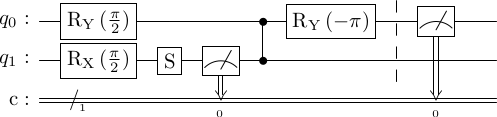

In [11]:
#Draws Quantum Circuit
qc.draw(output="latex")

In [12]:
#memory=True to access indivual simulation qubit measurement values
job=execute(qc,sim,shots=sim_run,memory=True)
result=job.result()
counts=result.get_counts()
memory=result.get_memory()

#print(memory)
#print(len(memory))

In [13]:
#creates lists for iterations
list_length=[]
for i in range (0,70):
    list_length.append(70)

#print(list_length)
#print(len(list_length))

In [14]:
#Create List for Superposition Pixel Generator
Input = iter(memory)
Quantum_Pixels = [list(islice(Input, x))
          for x in list_length]

#print(Quantum_Pixels)

In [15]:
Zero=str(input("Enter Hexadecimal code or Specified Value of 0:"))
One=str(input("Enter Hexadecimal code or Specified Value of 1:"))

In [16]:
#Start Draw and set Draw to immediate print
Draw = turtle.Turtle()
wn=turtle.Screen()
wn.tracer(0)
square_int = 30	

In [17]:
#Set Draw to top left corner of specified Print_Vertical and Print_Horizontal
Draw.penup()
Draw.forward(-960)
Draw.setheading(90)
Draw.forward(475)
Draw.setheading(0)

In [18]:
for x in range (0,len(Quantum_Pixels)):
    for i in range (0,len(Quantum_Pixels[x])):
        if Quantum_Pixels[x][i]=="1":

            Draw.color(One)
            Draw.begin_fill()
            Draw.forward(square_int)

            Draw.left(90)
            Draw.forward(square_int)

            Draw.left(90)
            Draw.forward(square_int)

            Draw.left(90)
            Draw.forward(square_int)

            Draw.end_fill()
            Draw.setheading(0)
        else:
            Draw.color(Zero)
            Draw.begin_fill()

            Draw.forward(square_int)
            
            Draw.left(90)
            Draw.forward(square_int)

            Draw.left(90)
            Draw.forward(square_int)

            Draw.left(90)
            Draw.forward(square_int)

            Draw.end_fill()
            Draw.setheading(0)

        Draw.penup()
        Draw.forward(square_int)
        Draw.pendown()
        	
    Draw.setheading(270) 
    Draw.penup()
    Draw.forward(square_int)
    Draw.setheading(180) 
    Draw.forward(square_int*len(Quantum_Pixels[x]))
    Draw.setheading(0)
    Draw.pendown()
	
Draw.getscreen().update()	
turtle.done()

TclError: invalid command name ".!canvas"